In [4]:
pip install scikit-surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 4.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp310-cp310-linux_x86_64.whl size=2357247 sha256=f42e26a9e6a7e8a0abeb203d024356682f24d31411d39ad8b2d6e0805a81633d
  Stored in directory: /root/.cache/pip/wheels/4b/3f/df/6acbf0a40397d9bf3ff97f582cc22fb9ce66adde75bc71fd54
Successfully built scikit-surprise


In [8]:
import pandas as pd
import numpy as np
from surprise.model_selection import train_test_split, cross_validate, GridSearchCV
import matplotlib.pyplot as plt
from surprise import accuracy, Dataset
from surprise import SVD, SVDpp, NMF
from scipy.io import loadmat

In [9]:
data = Dataset.load_builtin('ml-100k')

### Prepare the data

In [10]:
data_df = pd.DataFrame(data.raw_ratings, columns=["user_id", "item_id", "rating", "unix_timestamp"])
print(data_df.head())

  user_id item_id  rating unix_timestamp
0     196     242     3.0      881250949
1     186     302     3.0      891717742
2      22     377     1.0      878887116
3     244      51     2.0      880606923
4     166     346     1.0      886397596


In [11]:
print("Total No of user in data_df: ", len(data_df.user_id.unique()))
print("Total No of item in data_df: ", len(data_df.item_id.unique()))

print("\nMax rating", data_df.rating.max())
print("Min rating", data_df.rating.min())

rating_per_user = data_df.groupby('user_id').rating.count()
rating_per_item = data_df.groupby('item_id').rating.count()

print("\nMax No of user rating: ", rating_per_user.max())
print("Min No of user rating: ", rating_per_user.min())
print("Mediam No of user rating: ", rating_per_user.median())

print("\nMax No of item rating: ", rating_per_item.max())
print("Min No of item rating: ", rating_per_item.min())
print("Mediam No of item rating: ", rating_per_item.median())

Total No of user in data_df:  943
Total No of item in data_df:  1682

Max rating 5.0
Min rating 1.0

Max No of user rating:  737
Min No of user rating:  20
Mediam No of user rating:  65.0

Max No of item rating:  583
Min No of item rating:  1
Mediam No of item rating:  27.0


### Initialize the models

In [12]:
svd_model = SVD()
svdpp_model = SVDpp()
nmf_model = NMF()

In [13]:
cross_validate(svd_model, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)
cross_validate(svdpp_model, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)
cross_validate(nmf_model, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9380  0.9308  0.9362  0.9468  0.9275  0.9358  0.0066  
MAE (testset)     0.7415  0.7334  0.7374  0.7448  0.7313  0.7377  0.0050  
Fit time          1.54    1.43    1.45    1.47    2.10    1.60    0.25    
Test time         0.23    0.13    0.21    0.17    0.20    0.19    0.03    
Evaluating RMSE, MAE of algorithm SVDpp on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9087  0.9269  0.9140  0.9143  0.9252  0.9178  0.0070  
MAE (testset)     0.7111  0.7258  0.7168  0.7185  0.7248  0.7194  0.0054  
Fit time          26.40   26.77   26.46   26.36   26.57   26.51   0.15    
Test time         4.77    5.94    4.60    5.55    4.87    5.15    0.51    
Evaluating RMSE, MAE of algorithm NMF on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (tests

{'test_rmse': array([0.96978438, 0.96738343, 0.96061479, 0.95844593, 0.96437537]),
 'test_mae': array([0.75951874, 0.76149639, 0.75709733, 0.75262115, 0.75907012]),
 'fit_time': (2.0694143772125244,
  2.958601474761963,
  2.100461721420288,
  2.07578182220459,
  2.04166316986084),
 'test_time': (0.11495566368103027,
  0.10683298110961914,
  0.10342216491699219,
  0.10053586959838867,
  0.21875357627868652)}

In [14]:
def find_best_parameters(model_class, param_grid, trainset, data):
    grid_search = GridSearchCV(model_class, param_grid, measures=['rmse', 'mae'], cv=3)
    grid_search.fit(data)

    print(grid_search.best_params['rmse'])
    print(grid_search.best_params['mae'])

    best_params = grid_search.best_params['rmse']
    best_model = model_class(n_epochs=best_params['n_epochs'], lr_all=best_params['lr_all'], reg_all=best_params['reg_all'])
    best_model.fit(trainset)

    predictions = best_model.test(testset)
    rmse_svdpp = accuracy.rmse(predictions)
    print(f'MAE on test set: {mae}')
    print(f'RMSE on test set: {rmse_svd}')

#### SVD

In [15]:
param_grid = {'n_epochs': [5, 10, 15], 'lr_all': [0.002, 0.005, 0.01], 'reg_all': [0.4, 0.6, 0.8]}
grid_search = GridSearchCV(SVD, param_grid, measures=['rmse', 'mae'], cv=3)
grid_search.fit(data)
print(grid_search.best_params['rmse'])
print(grid_search.best_params['mae'])

{'n_epochs': 15, 'lr_all': 0.01, 'reg_all': 0.4}
{'n_epochs': 15, 'lr_all': 0.01, 'reg_all': 0.4}


In [16]:
best_params = grid_search.best_params['rmse']
best_model = SVD(n_epochs=best_params['n_epochs'], lr_all=best_params['lr_all'], reg_all=best_params['reg_all'])

In [17]:
trainset, testset = train_test_split(data, test_size=0.2, random_state=42)
train_data = trainset.build_testset()
train_df = pd.DataFrame(train_data, columns=["user_id", "item_id", "rating"])

In [18]:
best_model.fit(trainset)
predictions = best_model.test(testset)
mae = accuracy.mae(predictions)
rmse_svd = accuracy.rmse(predictions)
print(f'MAE on test set: {mae}')
print(f'RMSE on test set: {rmse_svd}')

MAE:  0.7667
RMSE: 0.9587
MAE on test set: 0.7667393551731647
RMSE on test set: 0.9587176681657164


In [19]:
find_best_parameters(SVD,param_grid, trainset, data)

{'n_epochs': 15, 'lr_all': 0.01, 'reg_all': 0.4}
{'n_epochs': 15, 'lr_all': 0.01, 'reg_all': 0.4}
RMSE: 0.9587
MAE on test set: 0.7667393551731647
RMSE on test set: 0.9587176681657164


#### SVD++

In [20]:
def find_best_parameters(model_class, param_grid, trainset, data):
    grid_search = GridSearchCV(model_class, param_grid, measures=['rmse', 'mae'], cv=3)
    grid_search.fit(data)

    print(grid_search.best_params['rmse'])
    print(grid_search.best_params['mae'])

    best_params = grid_search.best_params['rmse']
    best_model = model_class(n_epochs=best_params['n_epochs'], lr_all=best_params['lr_all'], reg_all=best_params['reg_all'])
    best_model.fit(trainset)

    predictions = best_model.test(testset)
    rmse_svdpp = accuracy.rmse(predictions)
    print(f'MAE on test set: {mae}')
    print(f'RMSE on test set: {rmse_svd}')


In [21]:
find_best_parameters(SVDpp,param_grid, trainset, data)

{'n_epochs': 15, 'lr_all': 0.01, 'reg_all': 0.4}
{'n_epochs': 15, 'lr_all': 0.01, 'reg_all': 0.4}
RMSE: 0.9587
MAE on test set: 0.7667393551731647
RMSE on test set: 0.9587176681657164


#### NMF

In [22]:
def find_best_parameters_nmf(model_class, param_grid, trainset, data):
    grid_search = GridSearchCV(model_class, param_grid, measures=['rmse', 'mae'], cv=3)
    grid_search.fit(data)

    print(grid_search.best_params['rmse'])
    print(grid_search.best_params['mae'])

    best_params = grid_search.best_params['rmse']
    best_model = model_class(
                             n_epochs=best_params['n_epochs'],

                             reg_pu=best_params['reg_pu'],
                             reg_qi=best_params['reg_qi'],
                             lr_bu=best_params['lr_bu'],
                             lr_bi=best_params['lr_bi'])
    best_model.fit(trainset)

    predictions = best_model.test(testset)
    rmse = accuracy.rmse(predictions)
    mae = accuracy.mae(predictions)
    print(f'MAE on test set: {mae}')
    print(f'RMSE on test set: {rmse}')

In [23]:
param_grid_nmf = {
              'n_epochs': [5, 10, 15],

              'reg_pu': [0.02, 0.04, 0.06],
              'reg_qi': [0.02, 0.04, 0.06],
              'lr_bu': [0.002, 0.005, 0.01],
              'lr_bi': [0.002, 0.005, 0.01]}
find_best_parameters_nmf(NMF,param_grid_nmf, trainset, data)
#'biased': [True, False],

{'n_epochs': 10, 'reg_pu': 0.06, 'reg_qi': 0.06, 'lr_bu': 0.005, 'lr_bi': 0.002}
{'n_epochs': 10, 'reg_pu': 0.06, 'reg_qi': 0.06, 'lr_bu': 0.002, 'lr_bi': 0.002}
RMSE: 0.9988
MAE:  0.7722
MAE on test set: 0.7721609867756112
RMSE on test set: 0.998825153587508


### Analysis results of SVD, SVD++, NMF

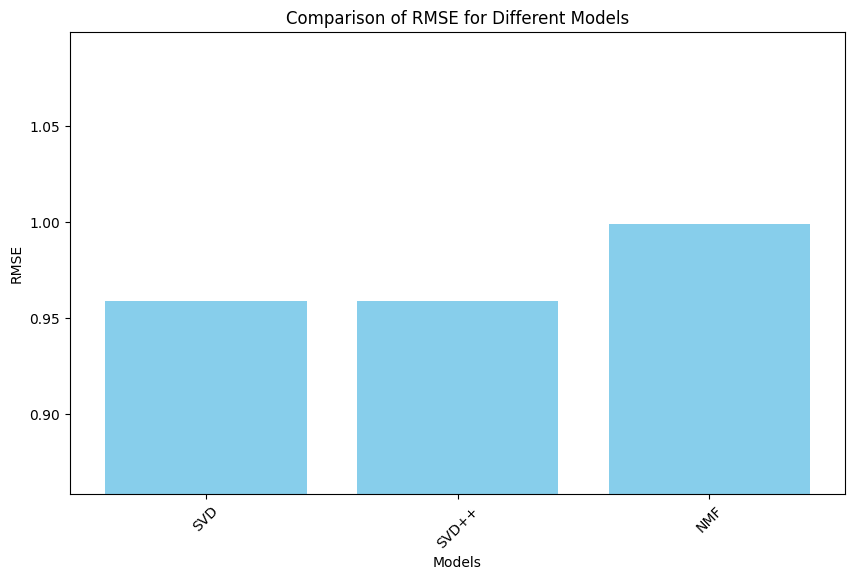

In [24]:
models = ['SVD', 'SVD++', 'NMF']
rmse_scores = [0.9587176681657164, 0.9587176681657164, 0.998825153587508]

plt.figure(figsize=(10, 6))
plt.bar(models, rmse_scores, color='skyblue')
plt.xlabel('Models')
plt.ylabel('RMSE')
plt.title('Comparison of RMSE for Different Models')
plt.ylim(min(rmse_scores) - 0.1, max(rmse_scores) + 0.1)
plt.xticks(rotation=45)
plt.show()

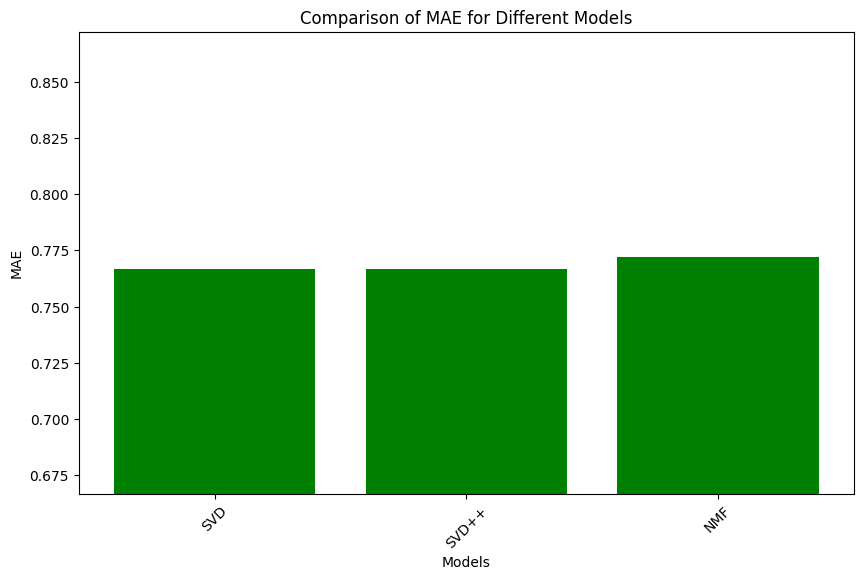

In [25]:
models = ['SVD', 'SVD++', 'NMF']
mae_scores = [0.7667393551731647, 0.7667393551731647, 0.7721609867756112]

plt.figure(figsize=(10, 6))
plt.bar(models, mae_scores, color='green')
plt.xlabel('Models')
plt.ylabel('MAE')
plt.title('Comparison of MAE for Different Models')
plt.ylim(min(mae_scores) - 0.1, max(mae_scores) + 0.1)
plt.xticks(rotation=45)
plt.show()